In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Imputer, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate,ShuffleSplit
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
#load the data and display the first 5 rows
rooms=pd.read_csv('C:/Users/castromi/Documents/GitHub/PRESC/datasets/mushrooms.csv')
rooms.head()


,edibility,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
feature_list = rooms.columns

In [4]:
#What are the categories and what features are they taking

for feature_name in feature_list:
    print(feature_name)
    print(rooms[feature_name].unique())
   

edibility
['p' 'e']
cap-shape
['x' 'b' 's' 'f' 'k' 'c']
cap-surface
['s' 'y' 'f' 'g']
cap-color
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises
['t' 'f']
odor
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment
['f' 'a']
gill-spacing
['c' 'w']
gill-size
['n' 'b']
gill-color
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape
['e' 't']
stalk-root
['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring
['s' 'f' 'k' 'y']
stalk-surface-below-ring
['s' 'f' 'y' 'k']
stalk-color-above-ring
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type
['p']
veil-color
['w' 'n' 'o' 'y']
ring-number
['o' 't' 'n']
ring-type
['p' 'e' 'l' 'f' 'n']
spore-print-color
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population
['s' 'n' 'a' 'v' 'y' 'c']
habitat
['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [5]:
#check if there are null entries
rooms.isnull().sum()
print(rooms.columns)

Index(['edibility', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


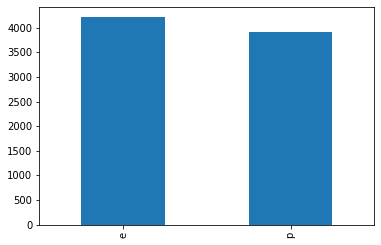

In [6]:
#How many edibles samples and not edibles samples do we have
rooms.edibility.value_counts(normalize=False).plot(kind='bar')


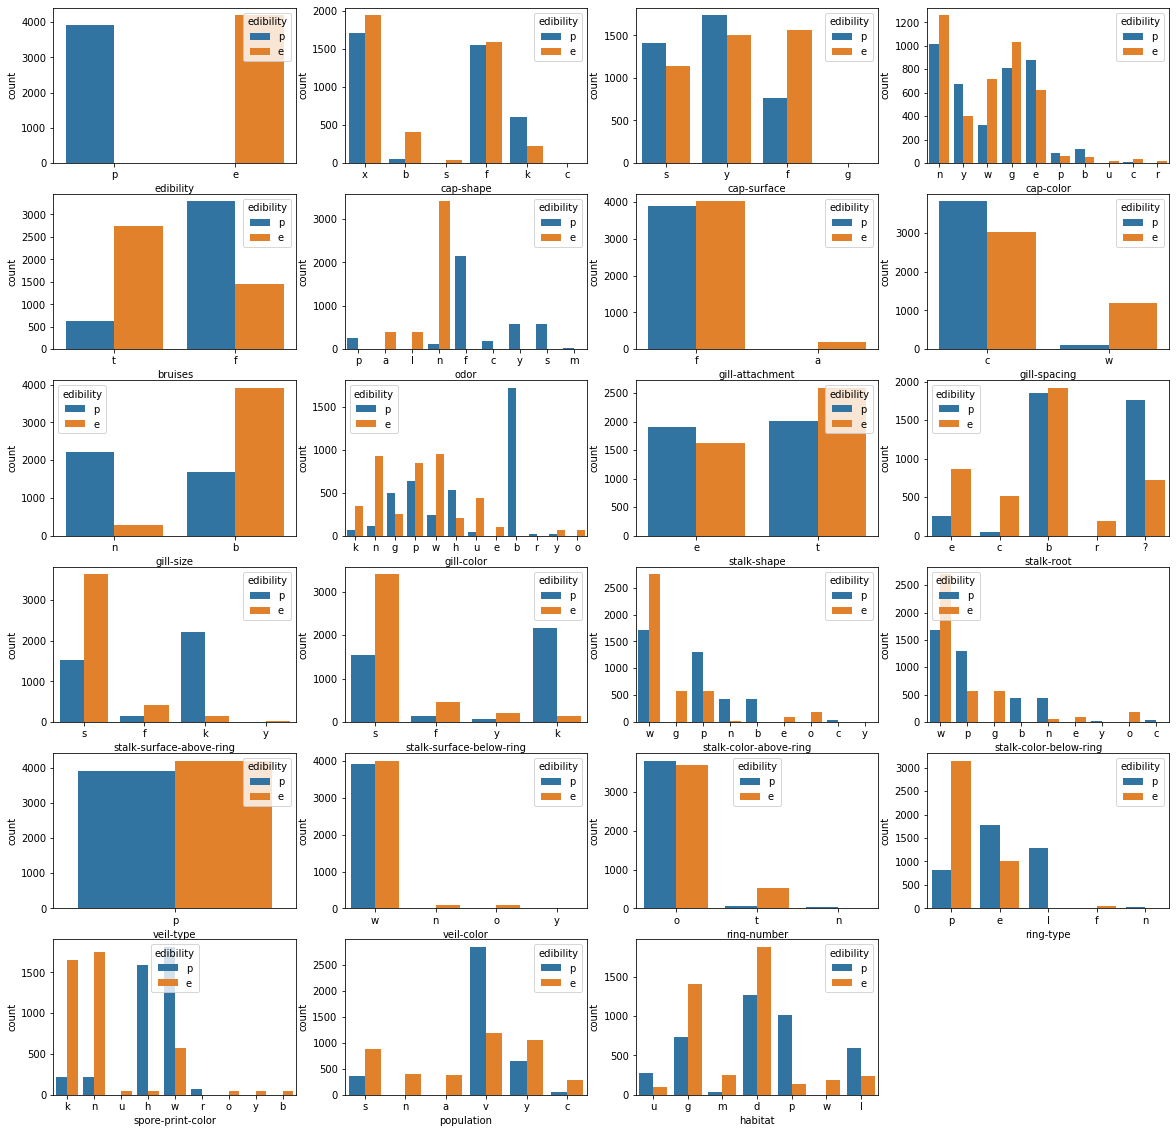

In [7]:

#lets plot a bar plot that for each category show for each value how many wow many where poisonous or edible 

fig, axs = plt.subplots(6,4,figsize=(20, 20))
features= rooms.columns
for i in range(0,6):
    for j in range(0,4):
        if( i*4 + j >= len(features)):
            axs[i][j].set_axis_off()   #do not display axis if we are over the max number of features
        else:
            s = sns.countplot(x = features[i*4 + j ], data = rooms, hue = 'edibility', ax=axs[i][j]) 
plt.show()            
        
            



In [8]:
#Encode y label
y= rooms.iloc[:,0].values
yencoder=LabelEncoder()
y=yencoder.fit_transform(y)

In [9]:
#One hot encode X
X=rooms.drop("edibility",axis=1)
xencoder=OneHotEncoder()
X=xencoder.fit_transform(X).toarray()


In [10]:
#split data
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.05,random_state=0)

In [11]:
#run a simple cross validation test
classifier = LogisticRegression(random_state=0,solver='lbfgs')
cv=ShuffleSplit(n_splits=5,train_size=0.05)
scores = cross_validate(classifier,X,y,cv=cv)

print(" The scores are:\n",scores['test_score'])

 The scores are:
 [0.98795025 0.98250842 0.98484063 0.99663125 0.98885722]


In [12]:
#train our model
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [13]:
#compute the confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

print(cm)
print(ac)


[[3930   80]
 [  70 3638]]
0.9805649131899455


In [14]:
import categorical_distance as catd
y_pred=classifier.predict(X)

spatial_analysis = catd.SpatialDistribution(rooms,y_pred,y)


    

In [15]:

print(spatial_analysis.distance_to_data(spatial_analysis._data.iloc[1],'overlap',0.001))

0.5108695652173914


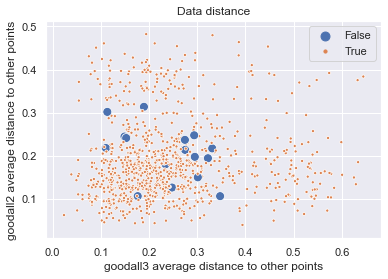

(<Figure size 432x288 with 1 Axes>,
 array([0.2217252 , 0.44398439, 0.23459039, 0.17917349, 0.1461132 ,
        0.33579363, 0.31061068, 0.15409936, 0.26132896, 0.24678788,
        0.25259415, 0.23655081, 0.23148798, 0.5220004 , 0.12604652,
        0.22978088, 0.38768744, 0.19922543, 0.1502654 , 0.52699322,
        0.16961559, 0.14838119, 0.29011586, 0.29205943, 0.24794473,
        0.14392393, 0.27265861, 0.28486401, 0.09377879, 0.17271821,
        0.23168028, 0.50714688, 0.22632581, 0.14392393, 0.13025367,
        0.17676576, 0.15460363, 0.09444692, 0.19439886, 0.17112062,
        0.20807518, 0.24743906, 0.21305586, 0.5352649 , 0.18960025,
        0.23230897, 0.15460363, 0.26737579, 0.17425052, 0.12717211,
        0.46292236, 0.12457413, 0.19660047, 0.26617451, 0.18582244,
        0.25395003, 0.44457704, 0.46874068, 0.27715058, 0.19564488,
        0.20051504, 0.17885056, 0.157012  , 0.20243353, 0.35429031,
        0.27194949, 0.25702629, 0.22003261, 0.48569334, 0.17985152,
        0.25

In [16]:
spatial_analysis.plot_distance_scatterplot('goodall3','goodall2',scatter_sample=1000,distance_sample=0.0001)
#print(spatial_analysis._append_prediction_label())
#print(spatial_analysis._append_prediction_label()["correctly-predicted"])

